## Math 157: Intro to Mathematical Software
## UC San Diego, winter 2018

## Group 7：Permutation Group By Ping Chen

###### Example:
Permutation Group and either be a text string, like "(3,4,5),(6,7)"
or can be a list of tuples, as the example below
- Source:http://doc.sagemath.org/html/en/reference/groups/sage/groups/perm_gps/permgroup.html#

In [2]:
G = PermutationGroup([[(3,4,5),(6,7)],[(8,9,10)]])

In [3]:
# the degree of Permutation Group
G.cardinality()

18

In [4]:
G.center()

Subgroup of (Permutation Group with generators [(8,9,10), (3,4,5)(6,7)]) generated by [(8,9,10), (6,7), (3,5,4)]

In [5]:
#return all the subgroups of a Permutation Group
G.center().list()

[(),
 (8,9,10),
 (3,5,4),
 (6,7),
 (3,5,4)(6,7),
 (3,4,5),
 (3,5,4)(8,9,10),
 (6,7)(8,9,10),
 (8,10,9),
 (3,4,5)(6,7),
 (3,5,4)(8,10,9),
 (3,4,5)(8,9,10),
 (6,7)(8,10,9),
 (3,5,4)(6,7)(8,9,10),
 (3,4,5)(8,10,9),
 (3,5,4)(6,7)(8,10,9),
 (3,4,5)(6,7)(8,9,10),
 (3,4,5)(6,7)(8,10,9)]

#### Symmetric Group

The full symmetric groups of a set G are all the permutations of the set, usually written as sym(G).
- Source: http://doc.sagemath.org/html/en/reference/groups/sage/groups/perm_gps/permgroup.html#

In [6]:
S = SymmetricGroup(6)

In [7]:
S.commutator()

Permutation Group with generators [(4,5,6), (1,2,3,4,5)]

In [8]:
S.is_abelian

<bound method SymmetricGroup_with_category.is_abelian of Symmetric group of order 6! as a permutation group>

In [9]:
a = S("(4,5,6)")
b = S("(1,3)")
H = S.subgroup([a,b])
H.list()

[(), (1,3), (4,5,6), (4,6,5), (1,3)(4,5,6), (1,3)(4,6,5)]

In [10]:
from sage.groups.perm_gps.permgroup_element import is_PermutationGroupElement
print(is_PermutationGroupElement(S))

False


In [11]:
E = PermutationGroupElement([(5,6), (1,2,3,4)])
print(is_PermutationGroupElement(E))

True


Elements in a permutation group can do algebraic computaions.

In [12]:
g = S.random_element()
g = S.gen(1)
g

(1,2)

In [13]:
f = g^(-1)
print(f)

(1,2)


#### Dihedral Group

- As a kind of permutation group, a dihedral group is the group of symmetries of a regular polygon, including rotations and flips.
- An n-gon group has 2n symmetries, composing of n rotations and n flips

In [14]:
#Dihedral group of order 20 as permutation group
D = DihedralGroup(10)

Subgroups can generated according to specific order we want. If $A$ is a subgroup of $D$ above and $g \in D$, $\{gag^{-1} | a \in D\}$  is also a subgroup of $D$. Therefore, a permutation group can generated a list with order of $k$. Since the list does not represents full subgroups of $D$, some permutaion groups of $D$ are not in the list with order of $k$ that is arbitrarily chosen.

cc = D.conjugacy_classes_subgroups()
print("An order two subgroup:{}".format(cc[1].list()))
random_g = D("(1,4)(2,3)(5,10)(6,9)(7,8)")
p = PermutationGroup([random_g])
print(p in cc)

### Cyclic Group

A cylic permutation is the mapping of each element to each other in the group and fix the other elements at the same time. A cylic permutation group with order $2n$ is defined to be $n$-cycle.
- Source:https://en.wikipedia.org/wiki/Cyclic_permutation

The standard cyclic form of a permutation group should be written as:
    
$$
\sigma = (a_{1},1,\dots,a_{1},k_{1})(a_{2},1,\dots,a_{2},k_{2})\dots(a_{m},1,\dots,a_{m},k_{m})\
$$

for $a1 < a2 <...< am$, and $k1 < k2 <...< km$

It can be represented as:
    $$
    \<a | a^{n} >\
    $$

In [16]:
C = PermutationGroup(['(2,3,4,5,6,7)'])
C.is_cyclic()

True

In [17]:
C.is_isomorphic(CyclicPermutationGroup(6))

True

In [18]:
CyclicPermutationGroup(10).as_finitely_presented_group()

Finitely presented group < a | a^10 >

###### Note: On the contrary to cyclic group, the [klein four-group](https://en.wikipedia.org/wiki/Klein_four-group) is the non-cyclic group with order 4.

In [3]:
K = KleinFourGroup();K

The Klein 4 group of order 4, as a permutation group

#### Alternating Group

- An Alternating Group is the group of even permutations of a finite set.Source: https://en.wikipedia.org/wiki/Alternating_group
- It contains $n!/2$ elements in an alternating group with symbol $n$.        

In [8]:
# get all the subgroups of alternating group with symbol 4
A = AlternatingGroup(4)
s1 = A("(1,2) (3,4)")
s2 = A("(1,3) (2,4)")
s3 = A("(1,4) (2,3)")
sub = A.subgroup([s1, s2, s3])

In [12]:
# Test properties of the alternating group
print(sub.is_abelian())
print(sub.is_normal(A))
print(sub.is_simple())

True
True
False


#### Cayley Table and Graph

Cayley Table is named after Arthur Cayley, who gives the idea of Cayley's theorem that each group G is isomorphic to a subgroup of the symmetric group acting on G.
- Source:https://en.wikipedia.org/wiki/Cayley%27s_theorem

Question: What can be told by the Cayley Table?

- The cayley table can be used to determine whether the permutation group is abelian or not. The permuation group is abelian or communicative if and only if the diagonal of the vayley table is symmetric.
- Each row and column of the cayley table is a permutation element of the permutation group, since no row or column of the table can contain the same element twice.

In [14]:
# Example:
D = DihedralGroup(6)
C = D.cayley_table(); C

*  a b c d e f g h i j k l
 +------------------------
a| a b c d e f g h i j k l
b| b a e h c j k d l f g i
c| c d f g b i l a k e h j
d| d c b a f e h g j i l k
e| e h j k a l i b g c d f
f| f g i l d k j c h b a e
g| g f d c i b a l e k j h
h| h e a b j c d k f l i g
i| i l k j g h e f a d c b
j| j k l i h g f e d a b c
k| k j h e l a b i c g f d
l| l i g f k d c j b h e a


In [22]:
# Example:
E = AlternatingGroup(4)
text= ['student', 'id', 'number', 'class','yes', 'no', 'play', 'study','','','','']
E.cayley_table(names=text)

      *  student      id  number   class     yes      no    play   study                                
       +------------------------------------------------------------------------------------------------
student| student      id  number   class     yes      no    play   study                                
     id|      id      no   class   study    play student          number     yes                        
 number|  number     yes    play      no                 student           study   class      id        
  class|   class    play         student                      id          number   study      no     yes
    yes|     yes              no         student  number   study    play              id           class
     no|      no student   study  number              id     yes   class    play                        
   play|    play         student              id   class  number                      no     yes   study
  study|   study             yes      id               

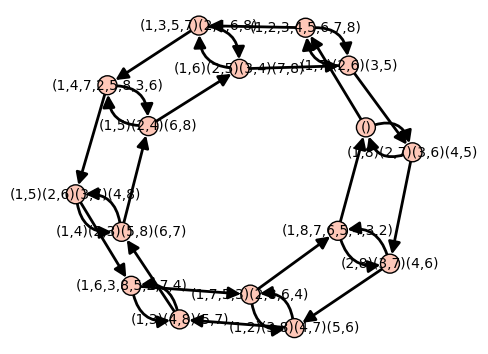

In [16]:
D8 = DihedralGroup(8)
show(D8.cayley_graph())

**Observations:**
- The cayley graph of D8 above with order 16 presents the 8 rotations r's and 2 flips f's. Therefore the product of number of r and f is 16 which is the order.
- It is represented as
    $$
    \langle rf \rvert r^{n}, f^{2}, (rf)^{2}\rangle
    $$

### Exercise:

1. Write a function to mimick the cayley table of the permutation group with order n, and test the function by comparing with the cayley_table().

In [0]:
# your code goes here

In [0]:
# Solution:
from sage.matrix.operation_table import OperationTable
def table(n):
    R=Integers(n)
    OT = OperationTable(R, operation=operator.add)
    return OT

In [0]:
table(10)

In [0]:
p = DihedralGroup(5)
p.cayley_table()

2. Write a function 'conj' to comprise a dihedral group with order n and a cyclic group with order m and return the conjugating self group.

In [0]:
def conj(n,m):
# your code goes here

In [0]:
#Solution:
def conj(n,m):
    D = DihedralGroup(n)
    C = CyclicPermutationGroup(m)
    if (n>m):
        H = PermutationGroup([D])
    else:
        H = PermutationGroup([C])
    d = H.degree()
    cycle = [i+1 for i in range(1, d)] + [1]
    p = H.conjugate(cycle)
    return p

In [0]:
conj(6,8)